In [92]:
import pyspark.sql.functions as F
from pyspark.sql.functions import sum, avg, count, first
from pyspark.sql.types import IntegerType, StringType, DoubleType, DecimalType
from pyspark.sql import Window
import sys
import plotly.graph_objects as go
import pandas as pd
import numpy as np
import sweetviz as sv
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [93]:
# Provide the correct file path
file_path = "/Users/andreguichard/Desktop/Master In Big Data/Machine Learning/Proyecto/dataset_para_modelar.csv"

# Read the CSV file into a Pandas DataFrame
df = pd.read_csv(file_path,delimiter=',')


# Show the first few rows of the DataFrame
print(df.head())

/var/folders/kx/ttlm9tqs63z73zxt8n3pptvm0000gn/T/ipykernel_1336/293654875.py:5: DtypeWarning: Columns (5,9,11) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path,delimiter=',')


   Unnamed: 0  cod_persona         mes pais sexo edad      fecha1  \
0           0       178103  2015-01-28   ES    H   35  2015-01-12   
1           1       503082  2015-01-28   ES    V   27  2012-08-10   
2           2       502996  2015-01-28   ES    V   37  2012-08-10   
3           3       503053  2015-01-28   ES    H   23  2012-08-10   
4           4       503031  2015-01-28   ES    H   44  2012-08-10   

  xti_empleado  xti_nuevo_cliente num_antiguedad  ...  ind_prod16 ind_prod17  \
0            N                0.0              6  ...           0          0   
1            N                0.0             35  ...           0          0   
2            N                0.0             35  ...           0          0   
3            N                0.0             35  ...           0          0   
4            N                0.0             35  ...           0          0   

   ind_prod18 ind_prod19 ind_prod20 ind_prod21 ind_prod22 ind_prod23  \
0           0          0        

In [94]:
df

,Unnamed: 0,cod_persona,mes,pais,sexo,edad,fecha1,xti_empleado,xti_nuevo_cliente,num_antiguedad,...,ind_prod16,ind_prod17,ind_prod18,ind_prod19,ind_prod20,ind_prod21,ind_prod22,ind_prod23,ind_prod24,ind_prod25
0,0,178103,2015-01-28,ES,H,35,2015-01-12,N,0.0,6,...,0,0,0,0,0,0,0.0,0.0,0,0
1,1,503082,2015-01-28,ES,V,27,2012-08-10,N,0.0,35,...,0,0,0,0,0,0,0.0,0.0,0,0
2,2,502996,2015-01-28,ES,V,37,2012-08-10,N,0.0,35,...,0,0,0,0,0,0,0.0,0.0,0,0
3,3,503053,2015-01-28,ES,H,23,2012-08-10,N,0.0,35,...,0,0,0,0,0,0,0.0,0.0,1,0
4,4,503031,2015-01-28,ES,H,44,2012-08-10,N,0.0,35,...,0,0,0,0,0,0,0.0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
634677,641702,256354,2016-04-28,ES,V,25,2014-08-18,N,0.0,25,...,0,0,0,0,0,0,0.0,0.0,1,0
634678,641703,256273,2016-04-28,ES,H,65,2014-08-18,N,0.0,20,...,0,0,0,0,0,0,0.0,0.0,0,0
634679,641704,256253,2016-04-28,ES,V,42,2014-08-18,N,0.0,20,...,0,0,0,0,0,0,0.0,0.0,0,0
634680,641705,256296,2016-04-28,ES,H,42,2014-08-18,N,0.0,20,...,0,0,0,0,0,0,0.0,0.0,0,0


# Limpieza de los datos




In [95]:
df.columns

Index(['Unnamed: 0', 'cod_persona', 'mes', 'pais', 'sexo', 'edad', 'fecha1',
       'xti_empleado', 'xti_nuevo_cliente', 'num_antiguedad', 'xti_rel',
       'fec_ult_cli_1t', 'xti_rel_1mes', 'tip_rel_1mes', 'indresi', 'indext',
       'des_canal', 'xti_extra', 'tip_dom', 'cod_provincia',
       'xti_actividad_cliente', 'imp_renta', 'id_segmento', 'mean_engagement',
       'ind_prod1', 'ind_prod2', 'ind_prod3', 'ind_prod4', 'ind_prod5',
       'ind_prod6', 'ind_prod7', 'ind_prod8', 'ind_prod9', 'ind_prod10',
       'ind_prod11', 'ind_prod12', 'ind_prod13', 'ind_prod14', 'ind_prod15',
       'ind_prod16', 'ind_prod17', 'ind_prod18', 'ind_prod19', 'ind_prod20',
       'ind_prod21', 'ind_prod22', 'ind_prod23', 'ind_prod24', 'ind_prod25'],
      dtype='object')

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 634682 entries, 0 to 634681
Data columns (total 49 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             634682 non-null  int64  
 1   cod_persona            634682 non-null  int64  
 2   mes                    634682 non-null  object 
 3   pais                   634626 non-null  object 
 4   sexo                   634617 non-null  object 
 5   edad                   634682 non-null  object 
 6   fecha1                 634626 non-null  object 
 7   xti_empleado           634626 non-null  object 
 8   xti_nuevo_cliente      634626 non-null  float64
 9   num_antiguedad         634682 non-null  object 
 10  xti_rel                634626 non-null  float64
 11  fec_ult_cli_1t         36 non-null      object 
 12  xti_rel_1mes           629040 non-null  float64
 13  tip_rel_1mes           629040 non-null  object 
 14  indresi                634626 non-nu

In [97]:
# Convert the columns to integer or float as needed using to_numeric
categorical_vars = df.select_dtypes(include='object').columns.tolist()

# Review the types to confirm conversion
print(categorical_vars)


['mes', 'pais', 'sexo', 'edad', 'fecha1', 'xti_empleado', 'num_antiguedad', 'fec_ult_cli_1t', 'tip_rel_1mes', 'indresi', 'indext', 'des_canal', 'xti_extra', 'id_segmento']


In [98]:
print(df.nunique())

Unnamed: 0               634682
cod_persona               46779
mes                          16
pais                         48
sexo                          2
edad                        216
fecha1                     5796
xti_empleado                  4
xti_nuevo_cliente             2
num_antiguedad              503
xti_rel                       2
fec_ult_cli_1t               20
xti_rel_1mes                  5
tip_rel_1mes                  4
indresi                       2
indext                        2
des_canal                   126
xti_extra                     2
tip_dom                       1
cod_provincia                52
xti_actividad_cliente         2
imp_renta                 34518
id_segmento                   3
mean_engagement             203
ind_prod1                     2
ind_prod2                     1
ind_prod3                     2
ind_prod4                     2
ind_prod5                     2
ind_prod6                     2
ind_prod7                     2
ind_prod

In [99]:
df.shape

(634682, 49)

In [100]:
# Check and handle missing values
print(df.isnull().sum())

Unnamed: 0                    0
cod_persona                   0
mes                           0
pais                         56
sexo                         65
edad                          0
fecha1                       56
xti_empleado                 56
xti_nuevo_cliente            56
num_antiguedad                0
xti_rel                      56
fec_ult_cli_1t           634646
xti_rel_1mes               5642
tip_rel_1mes               5642
indresi                      56
indext                       56
des_canal                  7178
xti_extra                    56
tip_dom                      56
cod_provincia              2946
xti_actividad_cliente        56
imp_renta                124164
id_segmento                7403
mean_engagement            5642
ind_prod1                     0
ind_prod2                     0
ind_prod3                     0
ind_prod4                     0
ind_prod5                     0
ind_prod6                     0
ind_prod7                     0
ind_prod

In [101]:
# Count occurrences of the text 'NA' across the entire DataFrame
na_text_count = (df == ' NA').sum().sum()
print(na_text_count)

56


In [102]:

# Convert date fields to datetime objects
df['mes'] = pd.to_datetime(df['mes'])
df['fecha1'] = pd.to_datetime(df['fecha1'])

# Replace ' NA' with NaN and convert column to numeric
df['edad'] = pd.to_numeric(df['edad'].replace(' NA', np.nan), errors='coerce')

# Fill missing values with the median
df['edad'].fillna(df['edad'].median(), inplace=True)

df


/var/folders/kx/ttlm9tqs63z73zxt8n3pptvm0000gn/T/ipykernel_1336/2707582260.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['edad'].fillna(df['edad'].median(), inplace=True)


,Unnamed: 0,cod_persona,mes,pais,sexo,edad,fecha1,xti_empleado,xti_nuevo_cliente,num_antiguedad,...,ind_prod16,ind_prod17,ind_prod18,ind_prod19,ind_prod20,ind_prod21,ind_prod22,ind_prod23,ind_prod24,ind_prod25
0,0,178103,2015-01-28,ES,H,35.0,2015-01-12,N,0.0,6,...,0,0,0,0,0,0,0.0,0.0,0,0
1,1,503082,2015-01-28,ES,V,27.0,2012-08-10,N,0.0,35,...,0,0,0,0,0,0,0.0,0.0,0,0
2,2,502996,2015-01-28,ES,V,37.0,2012-08-10,N,0.0,35,...,0,0,0,0,0,0,0.0,0.0,0,0
3,3,503053,2015-01-28,ES,H,23.0,2012-08-10,N,0.0,35,...,0,0,0,0,0,0,0.0,0.0,1,0
4,4,503031,2015-01-28,ES,H,44.0,2012-08-10,N,0.0,35,...,0,0,0,0,0,0,0.0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
634677,641702,256354,2016-04-28,ES,V,25.0,2014-08-18,N,0.0,25,...,0,0,0,0,0,0,0.0,0.0,1,0
634678,641703,256273,2016-04-28,ES,H,65.0,2014-08-18,N,0.0,20,...,0,0,0,0,0,0,0.0,0.0,0,0
634679,641704,256253,2016-04-28,ES,V,42.0,2014-08-18,N,0.0,20,...,0,0,0,0,0,0,0.0,0.0,0,0
634680,641705,256296,2016-04-28,ES,H,42.0,2014-08-18,N,0.0,20,...,0,0,0,0,0,0,0.0,0.0,0,0


In [103]:
# Calculate the threshold (50% of the number of rows)
threshold = 0.1 * len(df)

# Drop columns with missing values exceeding the threshold
df.dropna(axis=1, thresh=threshold, inplace=True)

df.shape

(634682, 48)

In [104]:
# Convert the 'mean_engagement' from string to a number
# Removing dots
# Convert 'mean_engagement' to string, remove dots, and convert to numeric
df['mean_engagement'] = df['mean_engagement'].astype(str).str.replace('.', '')
df['mean_engagement'] = pd.to_numeric(df['mean_engagement'], errors='coerce')

df['imp_renta'] = df['imp_renta'].astype(str).str.replace('.', '')
df['imp_renta'] = pd.to_numeric(df['imp_renta'], errors='coerce')

# Check the result
print(df['imp_renta'].head())

0      872181.0
1     7077759.0
2    10403508.0
3    13693023.0
4    11024553.0
Name: imp_renta, dtype: float64


In [105]:
df_2 = df.copy()

In [106]:
# Assuming df_2 is already loaded and contains the column 'imp_renta'

# Calculate specific percentile values of 'imp_renta'
thresholds = {
    '100th': np.percentile(df_2['imp_renta'].dropna(), 100),
    '75th': np.percentile(df_2['imp_renta'].dropna(), 75),
    '50th': np.percentile(df_2['imp_renta'].dropna(), 50),
    '25th': np.percentile(df_2['imp_renta'].dropna(), 25)
}

# Function to apply percentile values and handle NaN
def assign_percentile_value(x):
    if pd.isna(x):  # Check if the value is NaN
        return thresholds['25th']  # Assign NaN values to the 25th percentile
    elif x >= thresholds['75th']:
        return thresholds['100th']  # Values above the 75th percentile are set to the max (100th percentile)
    elif x >= thresholds['50th']:
        return thresholds['75th']  # Values between the 50th and 75th percentile
    elif x >= thresholds['25th']:
        return thresholds['50th']  # Values between the 25th and 50th percentile
    else:
        return thresholds['25th']  # Values below the 25th percentile

# Apply the function to the 'imp_renta' column in df_2
df_2['imp_renta_grouped'] = df_2['imp_renta'].apply(assign_percentile_value)

# Print unique percentile values and grouped values for verification
print(df_2['imp_renta_grouped'].unique())




[6.3562140e+06 1.0752192e+07 2.0575338e+07 5.1442119e+16]


In [107]:
df_2.shape

(634682, 49)

# Analisis Estadistico


In [108]:
# Delete insignificant variables
# Remove the 'Unnamed: 0' column if it's just an index

# Assuming df_2 is your DataFrame 'pais', 'des_canal', 'Unnamed: 0', 'tip_dom','imp_renta'

# List of columns to drop 'xti_empleado'
columns_to_drop = ['pais', 'des_canal', 'Unnamed: 0', 'tip_dom', 'xti_empleado','imp_renta']

# Drop multiple columns
df_2.drop(columns=columns_to_drop, inplace=True)

# Display the DataFrame to confirm changes
print(df_2.head())



   cod_persona        mes sexo  edad     fecha1  xti_nuevo_cliente  \
0       178103 2015-01-28    H  35.0 2015-01-12                0.0   
1       503082 2015-01-28    V  27.0 2012-08-10                0.0   
2       502996 2015-01-28    V  37.0 2012-08-10                0.0   
3       503053 2015-01-28    H  23.0 2012-08-10                0.0   
4       503031 2015-01-28    H  44.0 2012-08-10                0.0   

  num_antiguedad  xti_rel  xti_rel_1mes tip_rel_1mes  ... ind_prod17  \
0              6      1.0           1.0            A  ...          0   
1             35      1.0           1.0            I  ...          0   
2             35      1.0           1.0            A  ...          0   
3             35      1.0           1.0            A  ...          0   
4             35      1.0           1.0            I  ...          0   

  ind_prod18 ind_prod19  ind_prod20  ind_prod21 ind_prod22  ind_prod23  \
0          0          0           0           0        0.0         0.0  

In [109]:
# Separate categorical and numerical variables

categorical_vars = df_2.select_dtypes(include='object').columns.tolist()
numerical_vars = df_2.select_dtypes(exclude='object').columns.tolist()

# Print the lists of categorical and numerical variables
print("Categorical variables:", categorical_vars)
print("Numerical variables:", numerical_vars)

Categorical variables: ['sexo', 'num_antiguedad', 'tip_rel_1mes', 'indresi', 'indext', 'xti_extra', 'id_segmento']
Numerical variables: ['cod_persona', 'mes', 'edad', 'fecha1', 'xti_nuevo_cliente', 'xti_rel', 'xti_rel_1mes', 'cod_provincia', 'xti_actividad_cliente', 'mean_engagement', 'ind_prod1', 'ind_prod2', 'ind_prod3', 'ind_prod4', 'ind_prod5', 'ind_prod6', 'ind_prod7', 'ind_prod8', 'ind_prod9', 'ind_prod10', 'ind_prod11', 'ind_prod12', 'ind_prod13', 'ind_prod14', 'ind_prod15', 'ind_prod16', 'ind_prod17', 'ind_prod18', 'ind_prod19', 'ind_prod20', 'ind_prod21', 'ind_prod22', 'ind_prod23', 'ind_prod24', 'ind_prod25', 'imp_renta_grouped']


### Drop missing values

In [110]:
# Check and handle missing values
print(df_2.isnull().sum())
df_2 = df_2.dropna()

cod_persona                 0
mes                         0
sexo                       65
edad                        0
fecha1                     56
xti_nuevo_cliente          56
num_antiguedad              0
xti_rel                    56
xti_rel_1mes             5642
tip_rel_1mes             5642
indresi                    56
indext                     56
xti_extra                  56
cod_provincia            2946
xti_actividad_cliente      56
id_segmento              7403
mean_engagement          5642
ind_prod1                   0
ind_prod2                   0
ind_prod3                   0
ind_prod4                   0
ind_prod5                   0
ind_prod6                   0
ind_prod7                   0
ind_prod8                   0
ind_prod9                   0
ind_prod10                  0
ind_prod11                  0
ind_prod12                  0
ind_prod13                  0
ind_prod14                  0
ind_prod15                  0
ind_prod16                  0
ind_prod17

In [111]:
# Check and handle missing values
print(df_2.isnull().sum())

cod_persona              0
mes                      0
sexo                     0
edad                     0
fecha1                   0
xti_nuevo_cliente        0
num_antiguedad           0
xti_rel                  0
xti_rel_1mes             0
tip_rel_1mes             0
indresi                  0
indext                   0
xti_extra                0
cod_provincia            0
xti_actividad_cliente    0
id_segmento              0
mean_engagement          0
ind_prod1                0
ind_prod2                0
ind_prod3                0
ind_prod4                0
ind_prod5                0
ind_prod6                0
ind_prod7                0
ind_prod8                0
ind_prod9                0
ind_prod10               0
ind_prod11               0
ind_prod12               0
ind_prod13               0
ind_prod14               0
ind_prod15               0
ind_prod16               0
ind_prod17               0
ind_prod18               0
ind_prod19               0
ind_prod20               0
i

In [112]:
shape = df_2.shape
print(shape)

(624376, 43)


Summary Statistics for Categorical Variables:
          sexo  num_antiguedad tip_rel_1mes indresi  indext xti_extra  \
count   624376          624376       624376  624376  624376    624376   
unique       2             502            3       1       2         2   
top          V              12            I       S       N         N   
freq    341141            6378       339366  624376  596545    622954   

              id_segmento  
count              624376  
unique                  3  
top     02 - PARTICULARES  
freq               367509  


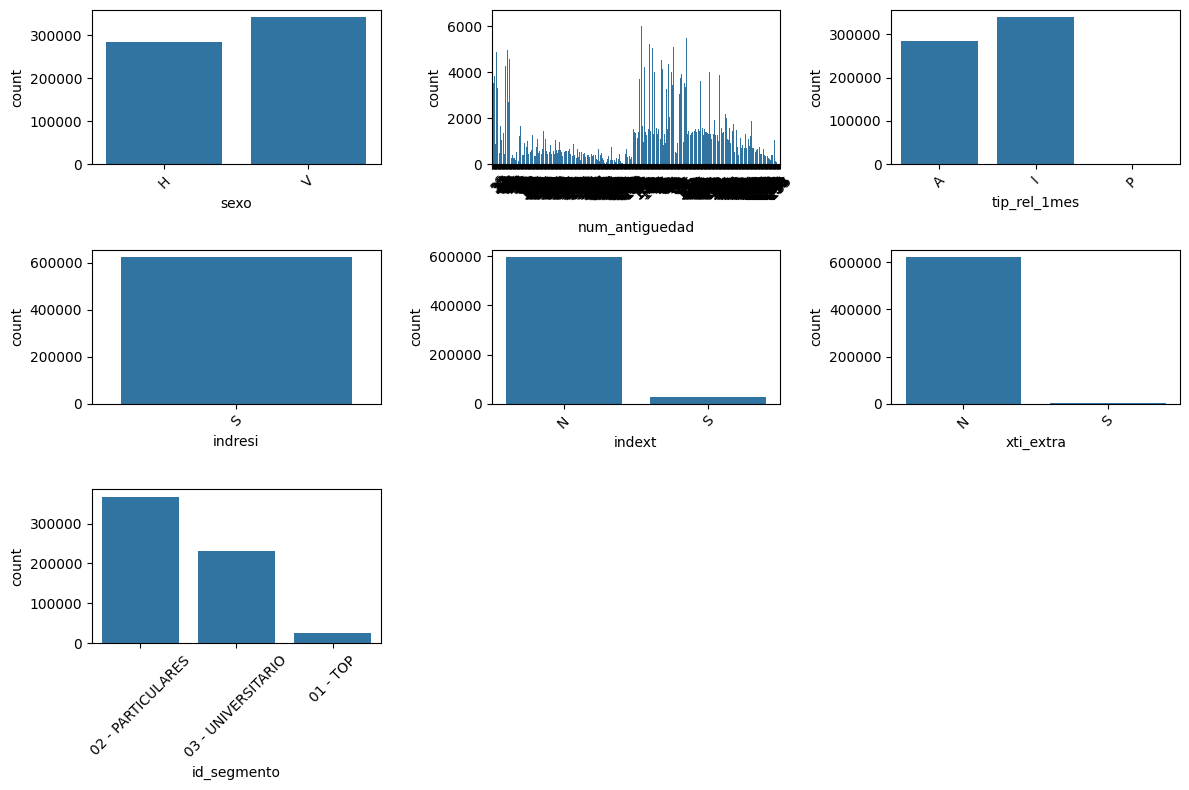

Summary Statistics for Numerical Variables:
        cod_persona                            mes           edad  \
count  6.243760e+05                         624376  624376.000000   
mean   7.253821e+05  2015-10-04 06:53:24.976488448      40.163839   
min    1.096900e+04            2015-01-28 00:00:00       2.000000   
25%    3.648440e+05            2015-06-28 00:00:00      24.000000   
50%    6.250000e+05            2015-10-28 00:00:00      39.000000   
75%    1.103294e+06            2016-01-28 00:00:00      51.000000   
max    1.537800e+06            2016-04-28 00:00:00     117.000000   
std    4.260909e+05                            NaN      17.198502   

                              fecha1  xti_nuevo_cliente        xti_rel  \
count                         624376      624376.000000  624376.000000   
mean   2009-01-17 21:51:08.535625984           0.050950       1.004395   
min              1995-01-16 00:00:00           0.000000       1.000000   
25%              2004-04-15 00:00:00  

<Figure size 1200x800 with 0 Axes>

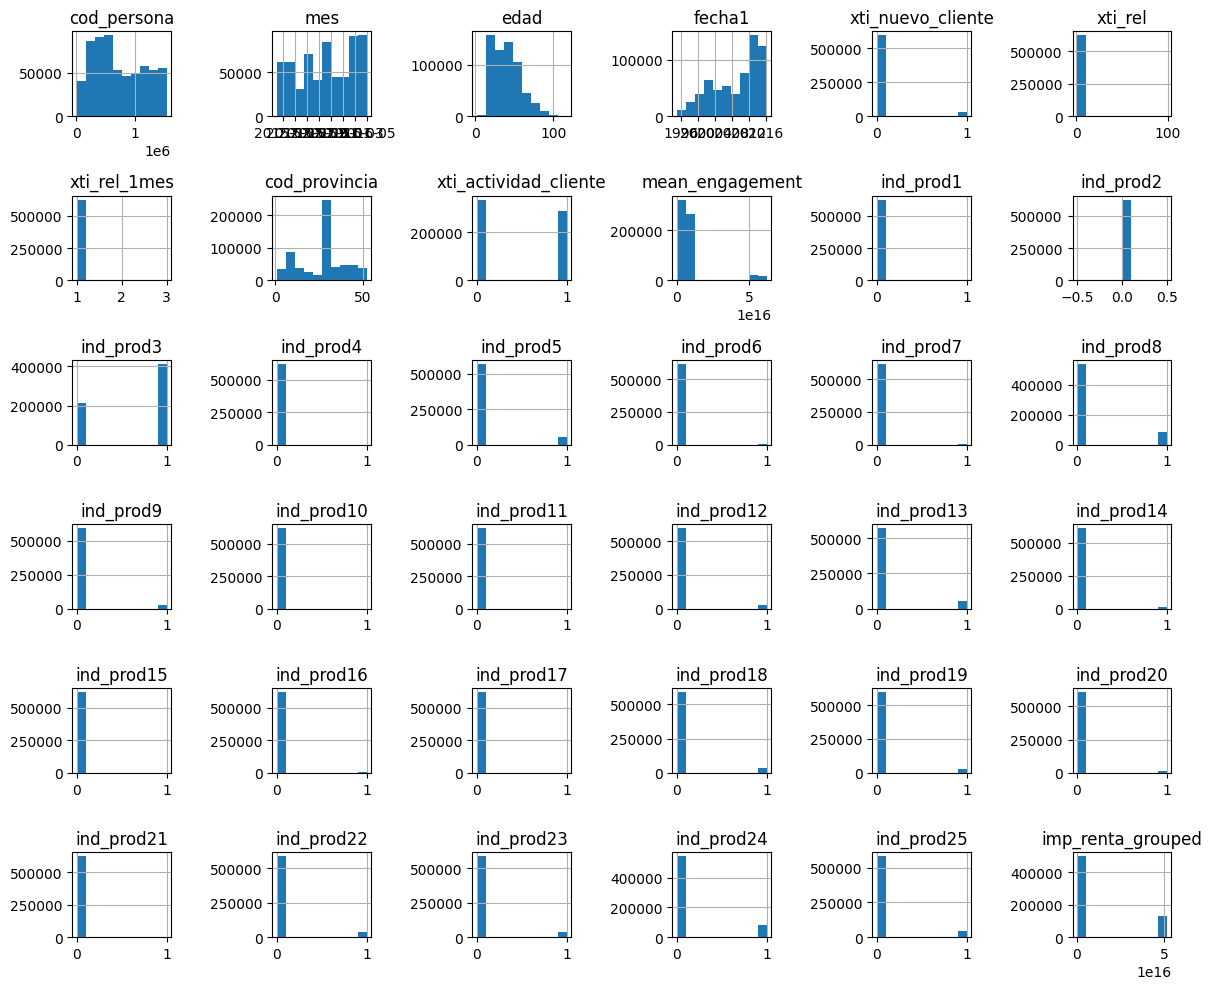

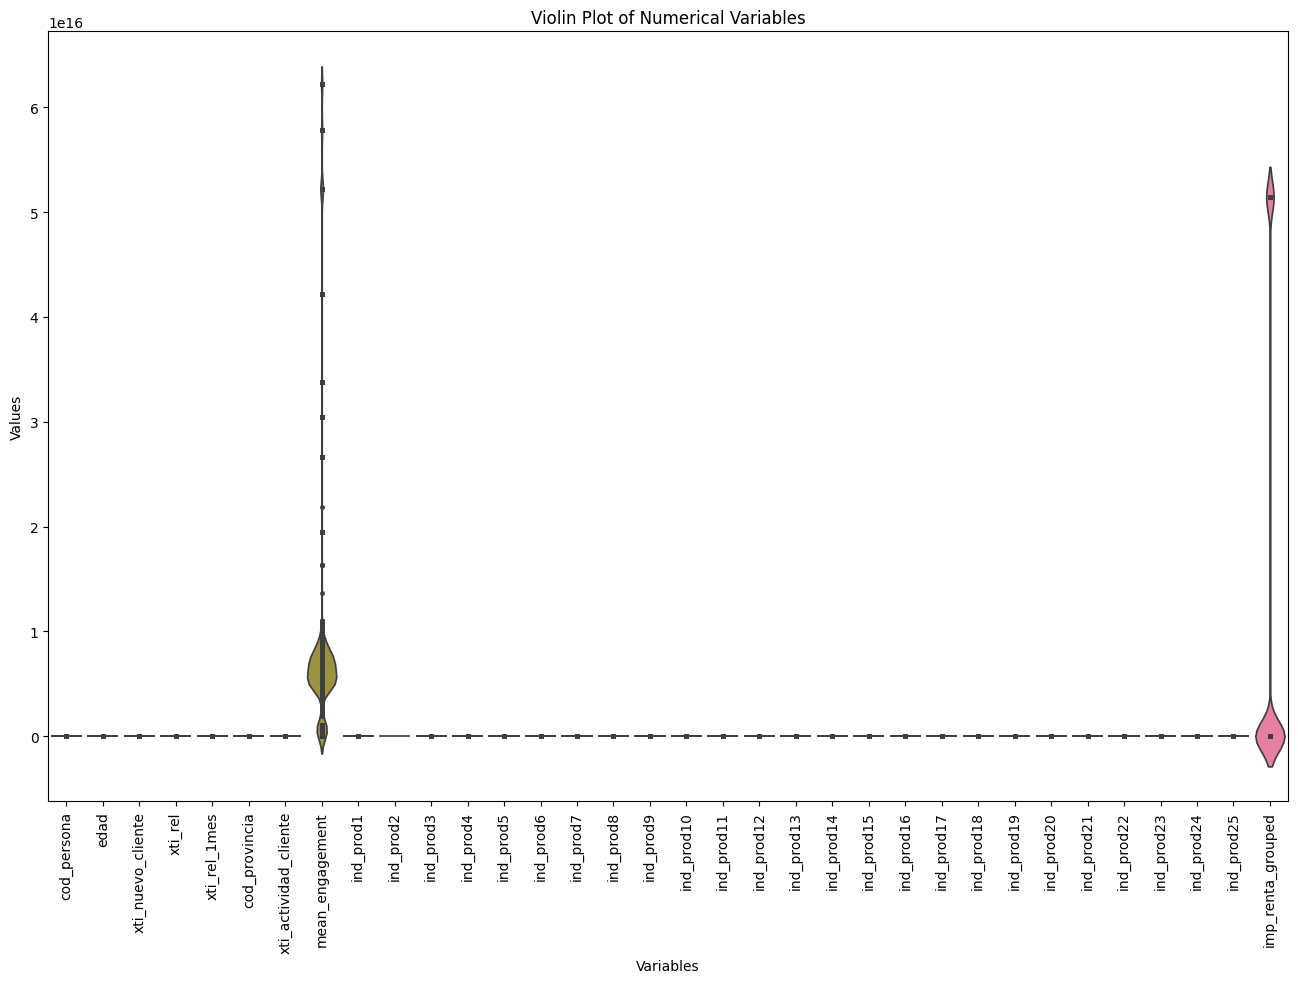

In [113]:
# 1. Descriptive statistics for categorical variables
print("Summary Statistics for Categorical Variables:")
print(df_2[categorical_vars].describe())

# 2. Data visualization for categorical variables
# Bar plot of categorical variables
plt.figure(figsize=(12, 8))
for col in categorical_vars:
    plt.subplot(3, 3, categorical_vars.index(col) + 1)
    sns.countplot(data=df_2, x=col)
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 3. Descriptive statistics for numerical variables
print("Summary Statistics for Numerical Variables:")
print(df_2[numerical_vars].describe())

# 4. Data visualization for numerical variables
# Histogram of numerical variables
plt.figure(figsize=(12, 8))
df_2[numerical_vars].hist(figsize=(12, 10))
plt.tight_layout()
plt.show()

# Violin plot of numerical variables
plt.figure(figsize=(16, 10))
sns.violinplot(data=df_2[numerical_vars], inner="points")
plt.xticks(rotation=90)
plt.title('Violin Plot of Numerical Variables')
plt.xlabel('Variables')
plt.ylabel('Values')
plt.show()

# Data Engineering

Ahora que vemos que variables son insignificativas podemos eliminar y despues hacer one hot enconding para convertir las variables categoricas en numericas 

In [114]:
categorical_vars_2  = df_2.select_dtypes(include='object').columns.tolist()
categorical_vars_2


['sexo',
 'num_antiguedad',
 'tip_rel_1mes',
 'indresi',
 'indext',
 'xti_extra',
 'id_segmento']

In [115]:
# Convert the 'xti_rel_1mes' column to float first to ensure all numeric
df_2['xti_rel_1mes'] = pd.to_numeric(df['xti_rel_1mes'], errors='coerce')
df_2['num_antiguedad'] = pd.to_numeric(df['num_antiguedad'], errors='coerce')

# Print updated DataFrame info to confirm the change
print(df_2.info())

df_2

<class 'pandas.core.frame.DataFrame'>
Index: 624376 entries, 0 to 634681
Data columns (total 43 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   cod_persona            624376 non-null  int64         
 1   mes                    624376 non-null  datetime64[ns]
 2   sexo                   624376 non-null  object        
 3   edad                   624376 non-null  float64       
 4   fecha1                 624376 non-null  datetime64[ns]
 5   xti_nuevo_cliente      624376 non-null  float64       
 6   num_antiguedad         624376 non-null  float64       
 7   xti_rel                624376 non-null  float64       
 8   xti_rel_1mes           624376 non-null  float64       
 9   tip_rel_1mes           624376 non-null  object        
 10  indresi                624376 non-null  object        
 11  indext                 624376 non-null  object        
 12  xti_extra              624376 non-null  object   

,cod_persona,mes,sexo,edad,fecha1,xti_nuevo_cliente,num_antiguedad,xti_rel,xti_rel_1mes,tip_rel_1mes,...,ind_prod17,ind_prod18,ind_prod19,ind_prod20,ind_prod21,ind_prod22,ind_prod23,ind_prod24,ind_prod25,imp_renta_grouped
0,178103,2015-01-28,H,35.0,2015-01-12,0.0,6.0,1.0,1.0,A,...,0,0,0,0,0,0.0,0.0,0,0,6.356214e+06
1,503082,2015-01-28,V,27.0,2012-08-10,0.0,35.0,1.0,1.0,I,...,0,0,0,0,0,0.0,0.0,0,0,1.075219e+07
2,502996,2015-01-28,V,37.0,2012-08-10,0.0,35.0,1.0,1.0,A,...,0,0,0,0,0,0.0,0.0,0,0,1.075219e+07
3,503053,2015-01-28,H,23.0,2012-08-10,0.0,35.0,1.0,1.0,A,...,0,0,0,0,0,0.0,0.0,1,0,2.057534e+07
4,503031,2015-01-28,H,44.0,2012-08-10,0.0,35.0,1.0,1.0,I,...,0,0,0,0,0,0.0,0.0,0,0,2.057534e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
634677,256354,2016-04-28,V,25.0,2014-08-18,0.0,25.0,1.0,1.0,A,...,0,0,0,0,0,0.0,0.0,1,0,5.144212e+16
634678,256273,2016-04-28,H,65.0,2014-08-18,0.0,20.0,1.0,1.0,I,...,0,0,0,0,0,0.0,0.0,0,0,6.356214e+06
634679,256253,2016-04-28,V,42.0,2014-08-18,0.0,20.0,1.0,1.0,I,...,0,0,0,0,0,0.0,0.0,0,0,5.144212e+16
634680,256296,2016-04-28,H,42.0,2014-08-18,0.0,20.0,1.0,1.0,I,...,0,0,0,0,0,0.0,0.0,0,0,6.356214e+06


In [116]:
# First, ensure df_3 is a fresh copy of df_2
df_3 = df_2.copy()

# Create a dictionary of columns and their respective mappings
mappings = {
    'sexo': {'H': 0, 'V': 1},
    'indresi': {'N': 0, 'S': 1},
    'indext': {'N': 0, 'S': 1},  # Uncomment these if you need to map these columns as well
    'xti_extra': {'N': 0, 'S': 1}
}

# Apply the mappings using a loop
for column, mapping in mappings.items():
    if column in df_3.columns:  # Check if the column exists to avoid KeyErrors
        df_3[column] = df_3[column].map(mapping)

# Display the updated DataFrame
print(df_3.head())

df_3

   cod_persona        mes  sexo  edad     fecha1  xti_nuevo_cliente  \
0       178103 2015-01-28     0  35.0 2015-01-12                0.0   
1       503082 2015-01-28     1  27.0 2012-08-10                0.0   
2       502996 2015-01-28     1  37.0 2012-08-10                0.0   
3       503053 2015-01-28     0  23.0 2012-08-10                0.0   
4       503031 2015-01-28     0  44.0 2012-08-10                0.0   

   num_antiguedad  xti_rel  xti_rel_1mes tip_rel_1mes  ...  ind_prod17  \
0             6.0      1.0           1.0            A  ...           0   
1            35.0      1.0           1.0            I  ...           0   
2            35.0      1.0           1.0            A  ...           0   
3            35.0      1.0           1.0            A  ...           0   
4            35.0      1.0           1.0            I  ...           0   

   ind_prod18  ind_prod19  ind_prod20  ind_prod21 ind_prod22  ind_prod23  \
0           0           0           0           0   

,cod_persona,mes,sexo,edad,fecha1,xti_nuevo_cliente,num_antiguedad,xti_rel,xti_rel_1mes,tip_rel_1mes,...,ind_prod17,ind_prod18,ind_prod19,ind_prod20,ind_prod21,ind_prod22,ind_prod23,ind_prod24,ind_prod25,imp_renta_grouped
0,178103,2015-01-28,0,35.0,2015-01-12,0.0,6.0,1.0,1.0,A,...,0,0,0,0,0,0.0,0.0,0,0,6.356214e+06
1,503082,2015-01-28,1,27.0,2012-08-10,0.0,35.0,1.0,1.0,I,...,0,0,0,0,0,0.0,0.0,0,0,1.075219e+07
2,502996,2015-01-28,1,37.0,2012-08-10,0.0,35.0,1.0,1.0,A,...,0,0,0,0,0,0.0,0.0,0,0,1.075219e+07
3,503053,2015-01-28,0,23.0,2012-08-10,0.0,35.0,1.0,1.0,A,...,0,0,0,0,0,0.0,0.0,1,0,2.057534e+07
4,503031,2015-01-28,0,44.0,2012-08-10,0.0,35.0,1.0,1.0,I,...,0,0,0,0,0,0.0,0.0,0,0,2.057534e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
634677,256354,2016-04-28,1,25.0,2014-08-18,0.0,25.0,1.0,1.0,A,...,0,0,0,0,0,0.0,0.0,1,0,5.144212e+16
634678,256273,2016-04-28,0,65.0,2014-08-18,0.0,20.0,1.0,1.0,I,...,0,0,0,0,0,0.0,0.0,0,0,6.356214e+06
634679,256253,2016-04-28,1,42.0,2014-08-18,0.0,20.0,1.0,1.0,I,...,0,0,0,0,0,0.0,0.0,0,0,5.144212e+16
634680,256296,2016-04-28,0,42.0,2014-08-18,0.0,20.0,1.0,1.0,I,...,0,0,0,0,0,0.0,0.0,0,0,6.356214e+06


In [117]:
# Convert 'id_segmento' to just the numeric part
df_3['id_segmento_numeric'] = df['id_segmento'].str.split(' - ').str[0].astype(float)

# Drop the column and reassign the DataFrame
df_3 = df_3.drop(columns='id_segmento')

# Display the DataFrame to confirm changes
df_3['id_segmento_numeric']


0         2.0
1         3.0
2         2.0
3         3.0
4         2.0
         ... 
634677    2.0
634678    2.0
634679    2.0
634680    2.0
634681    2.0
Name: id_segmento_numeric, Length: 624376, dtype: float64

In [118]:
# Display the DataFrame to confirm changes
df_3['id_segmento_numeric'].describe()


count    624376.000000
mean          2.326869
std           0.551865
min           1.000000
25%           2.000000
50%           2.000000
75%           3.000000
max           3.000000
Name: id_segmento_numeric, dtype: float64

In [119]:
# Apply one-hot encoding to 'tip_rel_1mes'
tip_rel_dummies = pd.get_dummies(df_3['tip_rel_1mes'], prefix='tip_rel_1mes')

# Convert the boolean columns to integer
tip_rel_dummies = tip_rel_dummies.astype(int)

# Concatenate the new columns to the original DataFrame
df_3 = pd.concat([df_3, tip_rel_dummies], axis=1)

# Optionally, drop the original 'tip_rel_1mes' column if it's no longer needed
df_3.drop('tip_rel_1mes', axis=1, inplace=True)

# Display the first few rows to see the result
print(df_3.head())


   cod_persona        mes  sexo  edad     fecha1  xti_nuevo_cliente  \
0       178103 2015-01-28     0  35.0 2015-01-12                0.0   
1       503082 2015-01-28     1  27.0 2012-08-10                0.0   
2       502996 2015-01-28     1  37.0 2012-08-10                0.0   
3       503053 2015-01-28     0  23.0 2012-08-10                0.0   
4       503031 2015-01-28     0  44.0 2012-08-10                0.0   

   num_antiguedad  xti_rel  xti_rel_1mes  indresi  ...  ind_prod21  \
0             6.0      1.0           1.0        1  ...           0   
1            35.0      1.0           1.0        1  ...           0   
2            35.0      1.0           1.0        1  ...           0   
3            35.0      1.0           1.0        1  ...           0   
4            35.0      1.0           1.0        1  ...           0   

   ind_prod22  ind_prod23  ind_prod24  ind_prod25  imp_renta_grouped  \
0         0.0         0.0           0           0          6356214.0   
1       

In [120]:
df_3['tip_rel_1mes_R'] = 0

df_3

,cod_persona,mes,sexo,edad,fecha1,xti_nuevo_cliente,num_antiguedad,xti_rel,xti_rel_1mes,indresi,...,ind_prod22,ind_prod23,ind_prod24,ind_prod25,imp_renta_grouped,id_segmento_numeric,tip_rel_1mes_A,tip_rel_1mes_I,tip_rel_1mes_P,tip_rel_1mes_R
0,178103,2015-01-28,0,35.0,2015-01-12,0.0,6.0,1.0,1.0,1,...,0.0,0.0,0,0,6.356214e+06,2.0,1,0,0,0
1,503082,2015-01-28,1,27.0,2012-08-10,0.0,35.0,1.0,1.0,1,...,0.0,0.0,0,0,1.075219e+07,3.0,0,1,0,0
2,502996,2015-01-28,1,37.0,2012-08-10,0.0,35.0,1.0,1.0,1,...,0.0,0.0,0,0,1.075219e+07,2.0,1,0,0,0
3,503053,2015-01-28,0,23.0,2012-08-10,0.0,35.0,1.0,1.0,1,...,0.0,0.0,1,0,2.057534e+07,3.0,1,0,0,0
4,503031,2015-01-28,0,44.0,2012-08-10,0.0,35.0,1.0,1.0,1,...,0.0,0.0,0,0,2.057534e+07,2.0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
634677,256354,2016-04-28,1,25.0,2014-08-18,0.0,25.0,1.0,1.0,1,...,0.0,0.0,1,0,5.144212e+16,2.0,1,0,0,0
634678,256273,2016-04-28,0,65.0,2014-08-18,0.0,20.0,1.0,1.0,1,...,0.0,0.0,0,0,6.356214e+06,2.0,0,1,0,0
634679,256253,2016-04-28,1,42.0,2014-08-18,0.0,20.0,1.0,1.0,1,...,0.0,0.0,0,0,5.144212e+16,2.0,0,1,0,0
634680,256296,2016-04-28,0,42.0,2014-08-18,0.0,20.0,1.0,1.0,1,...,0.0,0.0,0,0,6.356214e+06,2.0,0,1,0,0


In [121]:
# Calculate specific percentile values for 'mean_engagement'
engagement_thresholds = {
    '100th': np.percentile(df_3['mean_engagement'].dropna(), 100),
    '75th': np.percentile(df_3['mean_engagement'].dropna(), 75),
    '50th': np.percentile(df_3['mean_engagement'].dropna(), 50),
    '25th': np.percentile(df_3['mean_engagement'].dropna(), 25)
}

# Function to apply percentile values to 'mean_engagement'
def assign_engagement_percentile_value(x):
    if x >= engagement_thresholds['75th']:
        return engagement_thresholds['100th']  # Values above the 75th percentile are set to the max (100th percentile)
    elif x >= engagement_thresholds['50th']:
        return engagement_thresholds['75th']  # Values between the 50th and 75th percentile
    elif x >= engagement_thresholds['25th']:
        return engagement_thresholds['50th']  # Values between the 25th and 50th percentile
    else:
        return engagement_thresholds['25th']  # Values below the 25th percentile

# Apply the function to the 'mean_engagement' column
df_3['mean_engagement_grouped'] = df_3['mean_engagement'].apply(assign_engagement_percentile_value)

# Print unique percentile values assigned
print(df_3['mean_engagement_grouped'].unique())

# Drop the original 'mean_engagement' column
df_3.drop(columns=['mean_engagement'], inplace=True)


[7.49863000e+15 6.04947201e+15 4.90893587e+15 6.21852011e+16]


In [122]:
# Handle any specific preprocessing if necessary, e.g., handling 'fecha1'
df_3['year'] = pd.to_datetime(df_3['fecha1']).dt.year
df_3['month'] = pd.to_datetime(df_3['fecha1']).dt.month
df_3['day'] = pd.to_datetime(df_3['fecha1']).dt.day
df_3.drop(columns=['fecha1'], inplace=True)

In [123]:
# Continue with existing datetime conversion if not already applied
df['mes'] = pd.to_datetime(df['mes'], format='%d/%m/%y')

# Since 'fecha1' related columns already exist, create similarly structured columns for 'mes'
df['mes_year'] = df['mes'].dt.year
df['mes_month'] = df['mes'].dt.month
df['mes_day'] = df['mes'].dt.day
df_3.drop(columns=['mes'], inplace=True)


In [124]:
df_3.to_csv('output.csv', index=False)

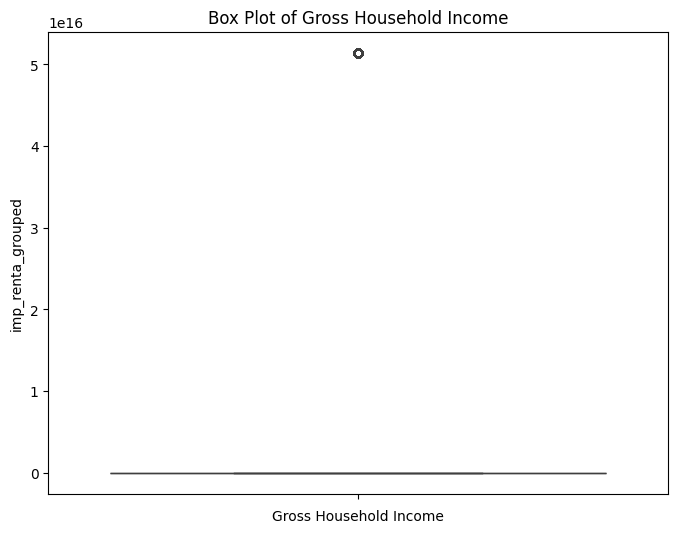

In [125]:
# Box plot of 'gross_household_income'
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_3['imp_renta_grouped'])
plt.title('Box Plot of Gross Household Income')
plt.xlabel('Gross Household Income')
plt.show()

In [126]:
# Assuming df_3 is your DataFrame
print(df_3.info())


<class 'pandas.core.frame.DataFrame'>
Index: 624376 entries, 0 to 634681
Data columns (total 47 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   cod_persona              624376 non-null  int64  
 1   sexo                     624376 non-null  int64  
 2   edad                     624376 non-null  float64
 3   xti_nuevo_cliente        624376 non-null  float64
 4   num_antiguedad           624376 non-null  float64
 5   xti_rel                  624376 non-null  float64
 6   xti_rel_1mes             624376 non-null  float64
 7   indresi                  624376 non-null  int64  
 8   indext                   624376 non-null  int64  
 9   xti_extra                624376 non-null  int64  
 10  cod_provincia            624376 non-null  float64
 11  xti_actividad_cliente    624376 non-null  float64
 12  ind_prod1                624376 non-null  int64  
 13  ind_prod2                624376 non-null  int64  
 14  ind_prod3

# Modelling

In [128]:
from sklearn.preprocessing import StandardScaler

# Ensure data is sorted by time
df_3.sort_values(by=['year', 'month', 'day'], inplace=True)

# Create lagged features
for col in df_3.columns:
    if col not in ['cod_persona', 'year', 'month', 'day']:
        df_3[f'{col}_lag1'] = df_3.groupby('cod_persona')[col].shift(1)

# Drop rows with NaN values
df_3.dropna(inplace=True)

# Define features and targets
feature_cols = [col for col in df_3.columns if 'ind_prod' not in col and col != 'cod_persona']
target_cols = [col for col in df_3.columns if 'ind_prod' in col and 'lag' not in col]

# Split data into features and targets
X = df_3[feature_cols]
Y = df_3[target_cols]

# Reset index to avoid positional indexers issues
X.reset_index(drop=True, inplace=True)
Y.reset_index(drop=True, inplace=True)

# Split the data into training and testing sets based on time
X_train = X[X['year'] < X['year'].max()]
X_test = X[X['year'] == X['year'].max()]
Y_train = Y.loc[X_train.index]
Y_test = Y.loc[X_test.index]

# Normalize the feature data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



In [130]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize the XGBoost classifier
xgb_clf = xgb.XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    eta=0.1,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    use_label_encoder=False
)

# Wrap the XGBoost classifier in MultiOutputClassifier
multi_target_xgb = MultiOutputClassifier(xgb_clf, n_jobs=-1)

# Train the model
multi_target_xgb.fit(X_train_scaled, Y_train)


MultiOutputClassifier(estimator=XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=0.8, device=None,
                                              early_stopping_rounds=None,
                                              enable_categorical=False, eta=0.1,
                                              eval_metric='logloss',
                                              feature_types=None, gamma=None,
                                              grow_policy=None,
                                              importance_type=None,
                                              interaction_constraints=None,
                                              learning_rate=None, max_bin=None,
                                              max_cat_threshold=None,
                                              max_cat_to_onehot=None,
                                              max_delta_step=None, max_depth=6,
                                              max_leaves=None,
                                              min_child_weight=None,
                                              missing=nan,
                                              monotone_constraints=None,
                                              multi_strategy=None,
                                              n_estimators=None, n_jobs=None,
                                              num_parallel_tree=None, ...),
                      n_jobs=-1)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:386: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


ind_prod1:
  Accuracy: 1.00
  Precision: 1.00
  Recall: 1.00
  F1 Score: 1.00


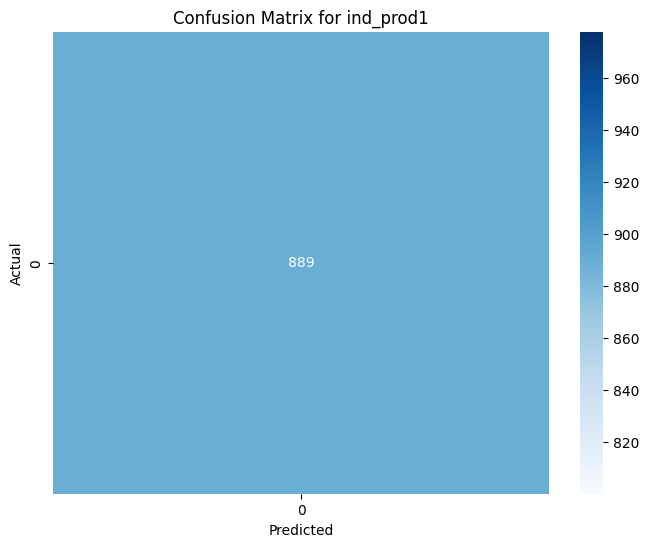

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:386: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


ind_prod2:
  Accuracy: 1.00
  Precision: 1.00
  Recall: 1.00
  F1 Score: 1.00


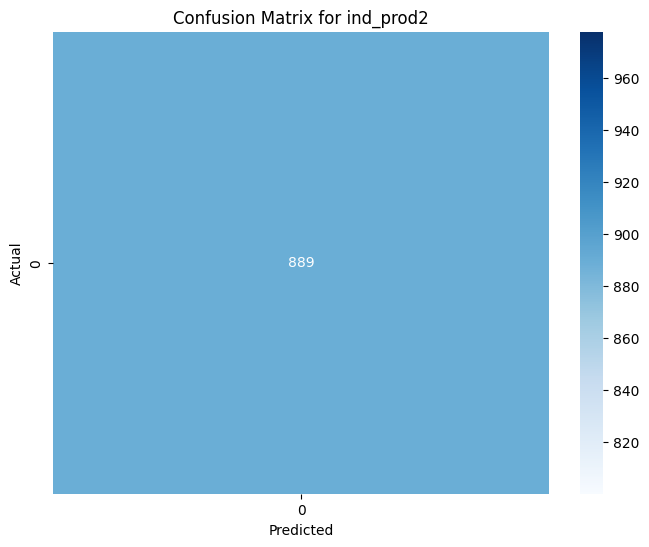

ind_prod3:
  Accuracy: 0.81
  Precision: 0.83
  Recall: 0.78
  F1 Score: 0.79


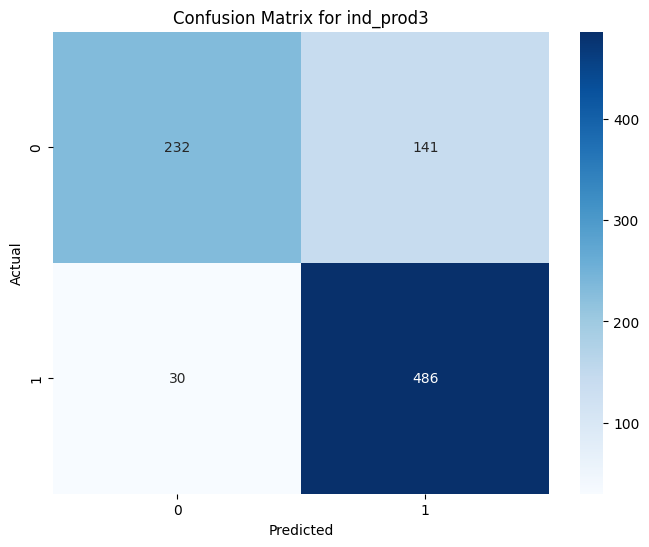

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:386: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


ind_prod4:
  Accuracy: 1.00
  Precision: 1.00
  Recall: 1.00
  F1 Score: 1.00


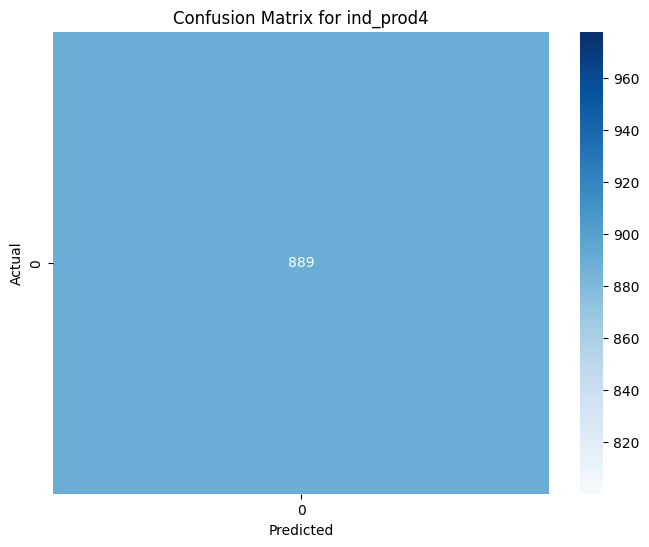

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


ind_prod5:
  Accuracy: 0.93
  Precision: 0.47
  Recall: 0.50
  F1 Score: 0.48


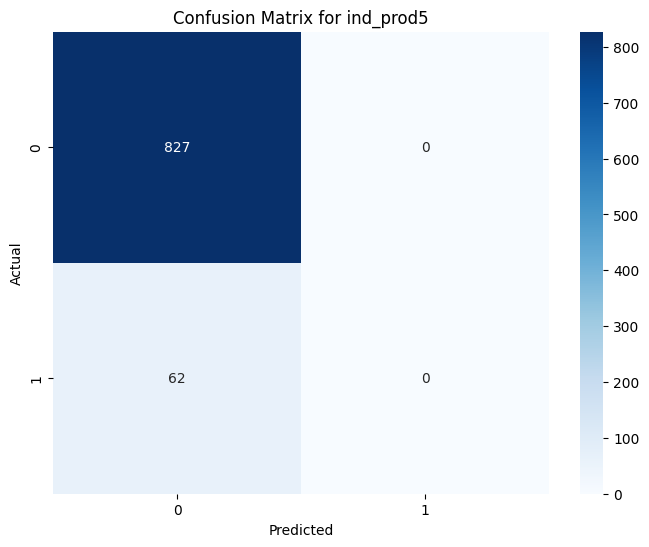

ind_prod6:
  Accuracy: 1.00
  Precision: 1.00
  Recall: 0.91
  F1 Score: 0.95


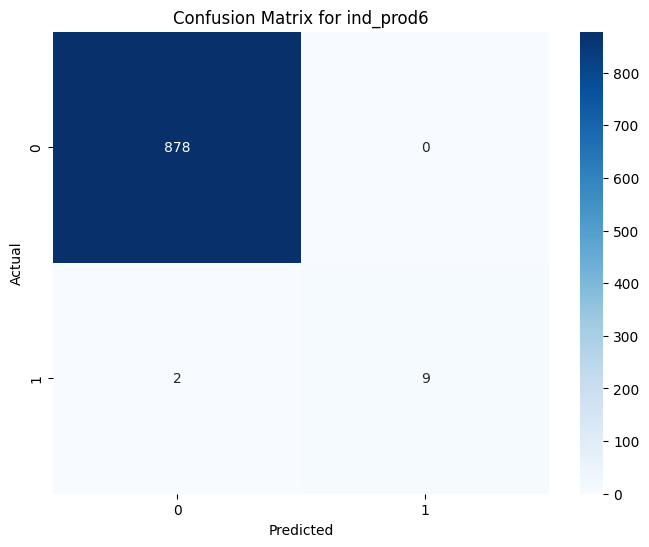

ind_prod7:
  Accuracy: 0.89
  Precision: 0.89
  Recall: 0.61
  F1 Score: 0.64


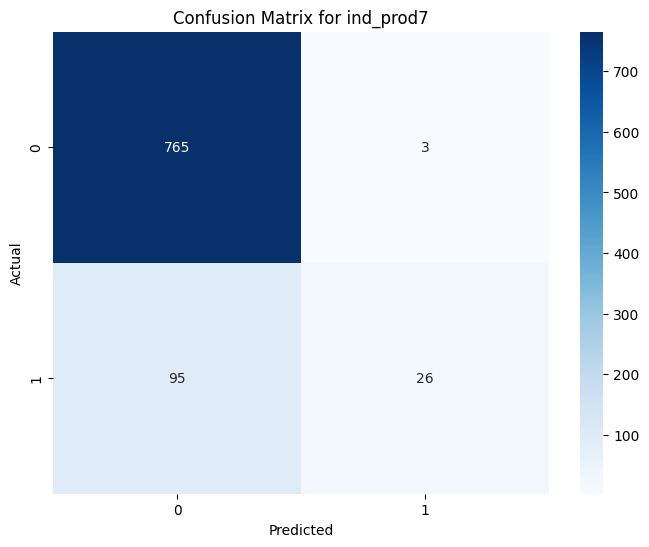

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:386: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


ind_prod8:
  Accuracy: 1.00
  Precision: 1.00
  Recall: 1.00
  F1 Score: 1.00


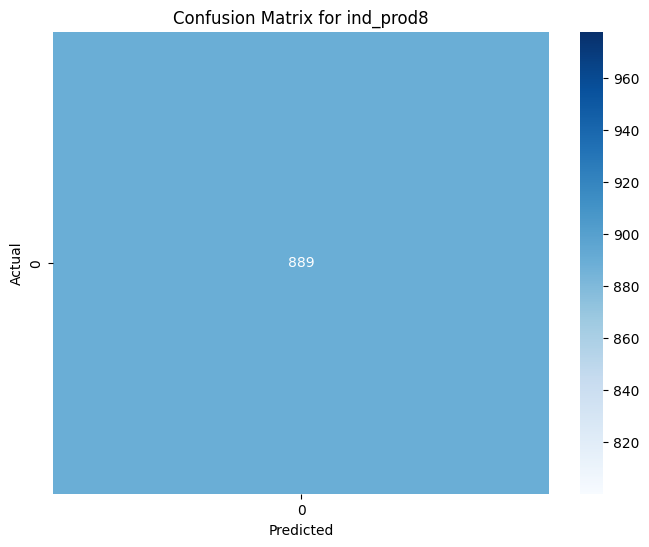

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:386: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


ind_prod9:
  Accuracy: 1.00
  Precision: 1.00
  Recall: 1.00
  F1 Score: 1.00


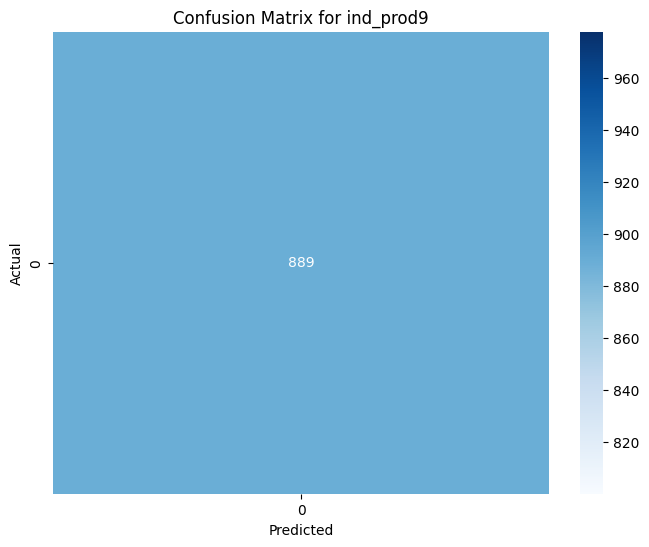

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


ind_prod10:
  Accuracy: 0.98
  Precision: 0.50
  Recall: 0.49
  F1 Score: 0.49


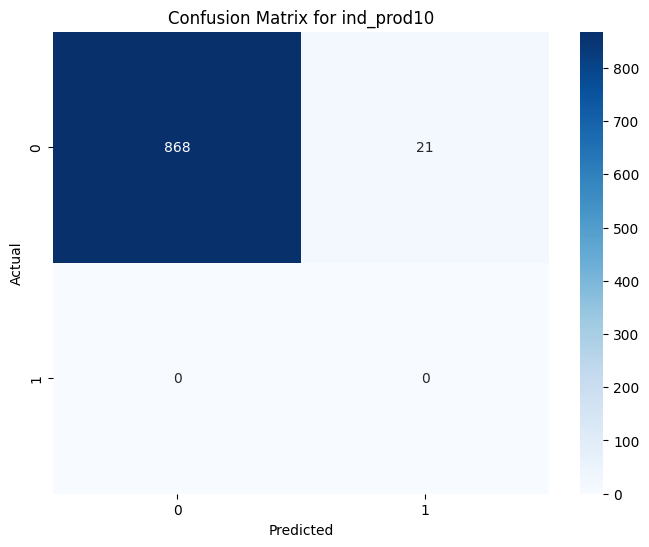

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:386: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


ind_prod11:
  Accuracy: 1.00
  Precision: 1.00
  Recall: 1.00
  F1 Score: 1.00


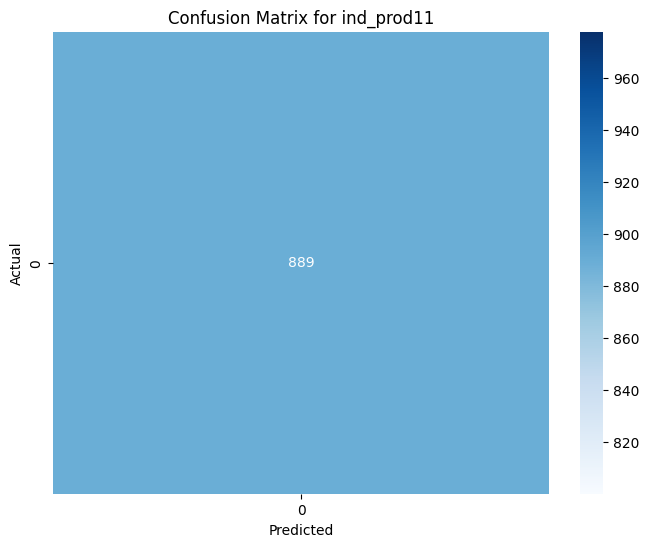

ind_prod12:
  Accuracy: 0.99
  Precision: 0.75
  Recall: 0.56
  F1 Score: 0.60


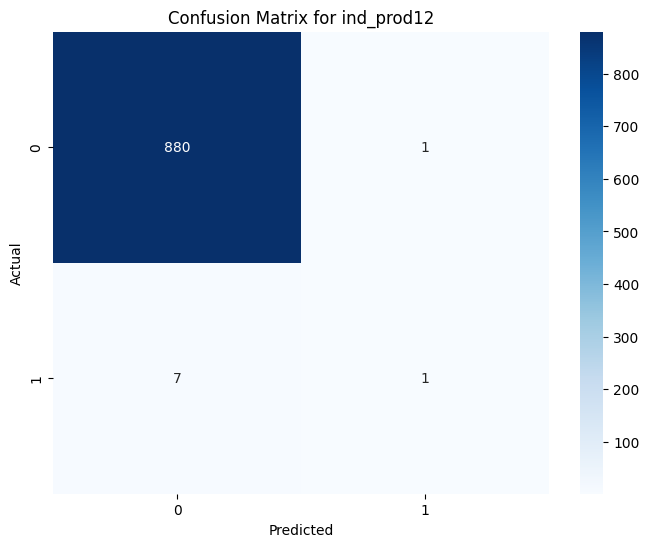

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


ind_prod13:
  Accuracy: 0.98
  Precision: 0.49
  Recall: 0.50
  F1 Score: 0.50


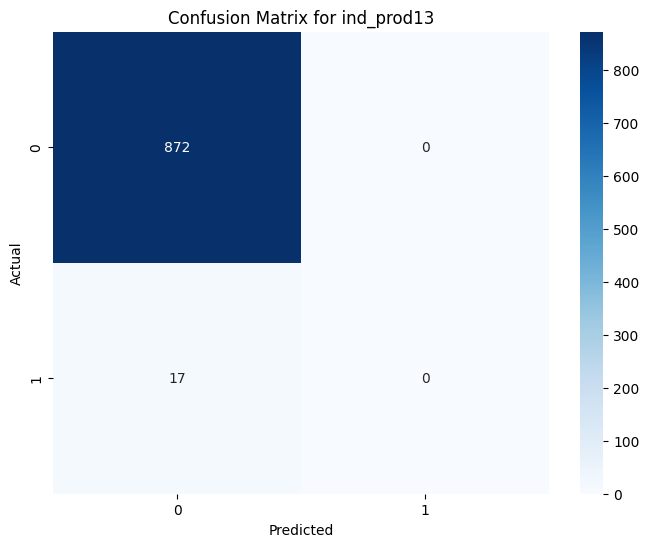

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:386: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


ind_prod14:
  Accuracy: 1.00
  Precision: 1.00
  Recall: 1.00
  F1 Score: 1.00


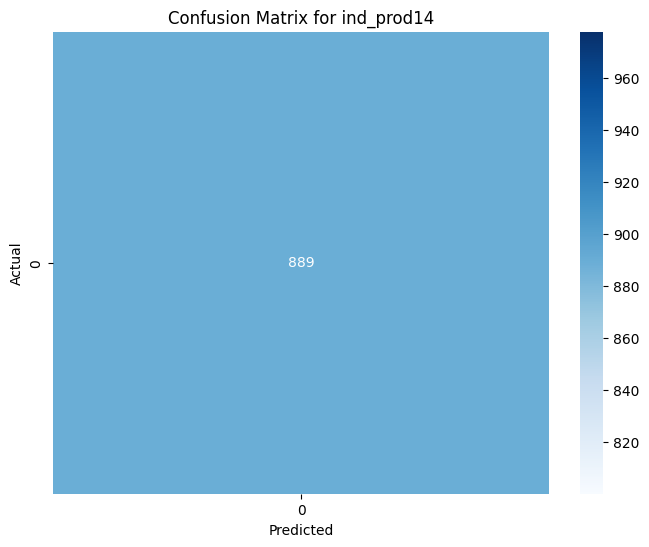

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:386: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


ind_prod15:
  Accuracy: 1.00
  Precision: 1.00
  Recall: 1.00
  F1 Score: 1.00


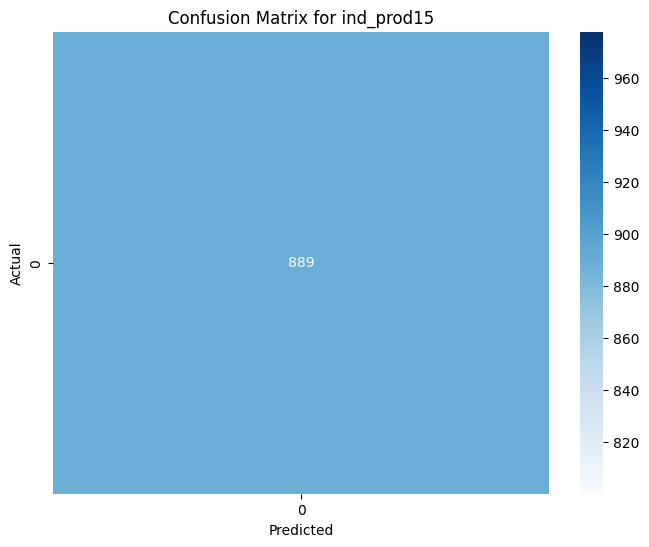

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


ind_prod16:
  Accuracy: 1.00
  Precision: 0.50
  Recall: 0.50
  F1 Score: 0.50


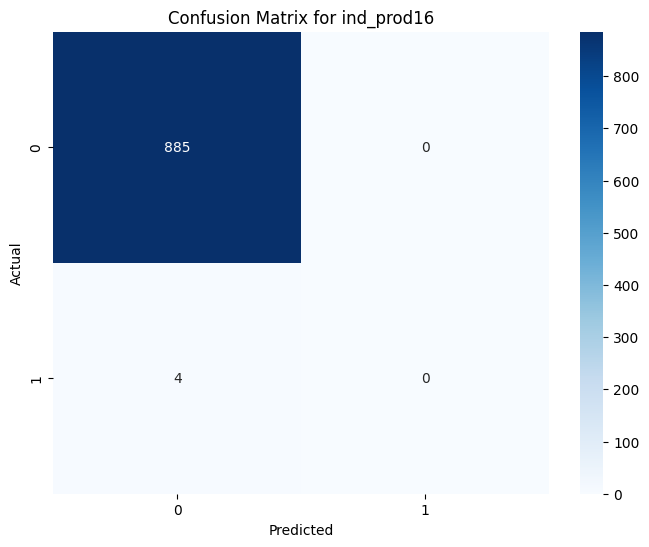

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:386: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


ind_prod17:
  Accuracy: 1.00
  Precision: 1.00
  Recall: 1.00
  F1 Score: 1.00


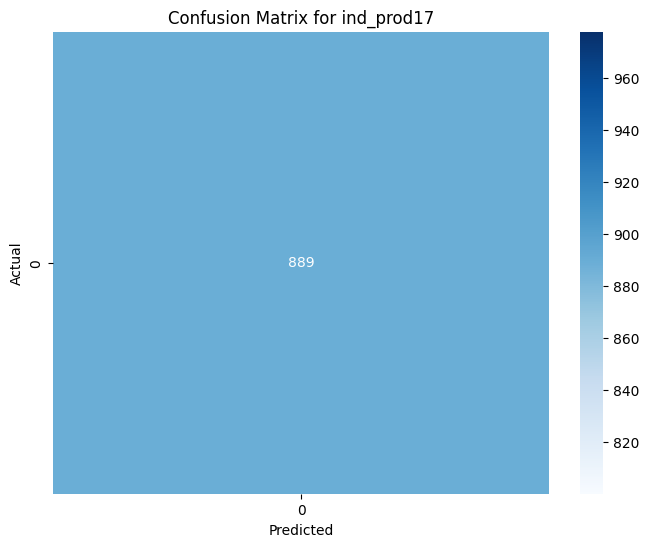

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


ind_prod18:
  Accuracy: 0.99
  Precision: 0.50
  Recall: 0.50
  F1 Score: 0.50


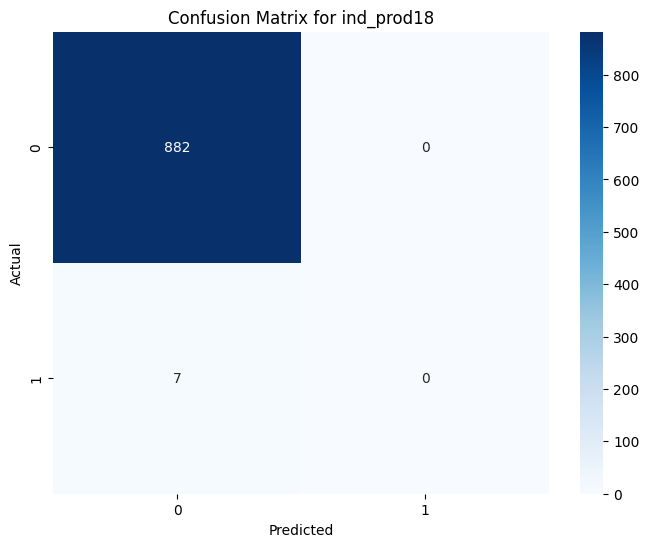

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


ind_prod19:
  Accuracy: 1.00
  Precision: 0.50
  Recall: 0.50
  F1 Score: 0.50


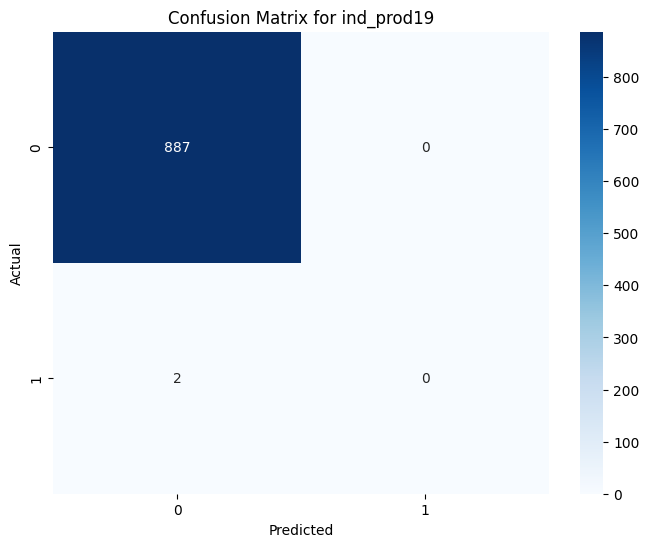

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


ind_prod20:
  Accuracy: 0.99
  Precision: 0.50
  Recall: 0.50
  F1 Score: 0.50


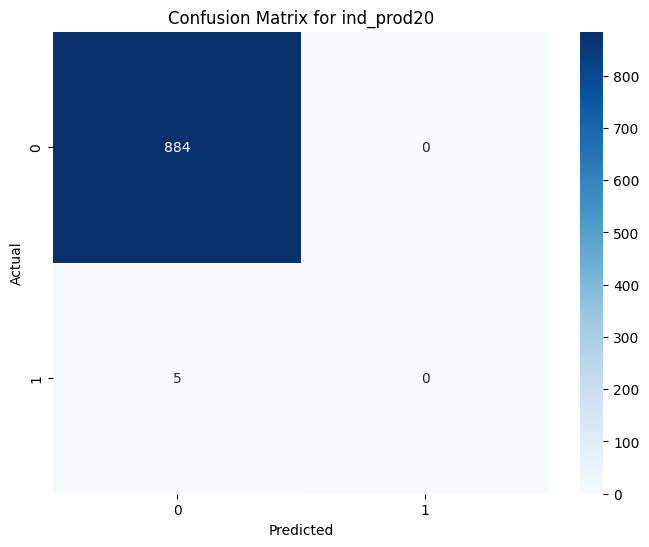

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:386: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


ind_prod21:
  Accuracy: 1.00
  Precision: 1.00
  Recall: 1.00
  F1 Score: 1.00


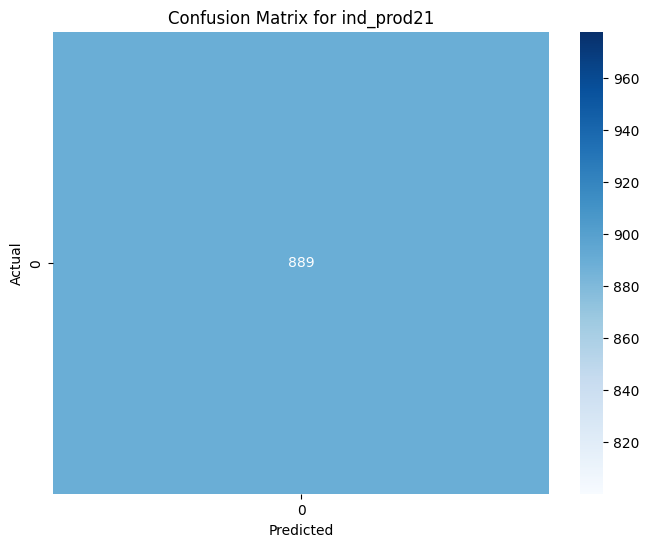

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


ind_prod22:
  Accuracy: 0.95
  Precision: 0.47
  Recall: 0.50
  F1 Score: 0.49


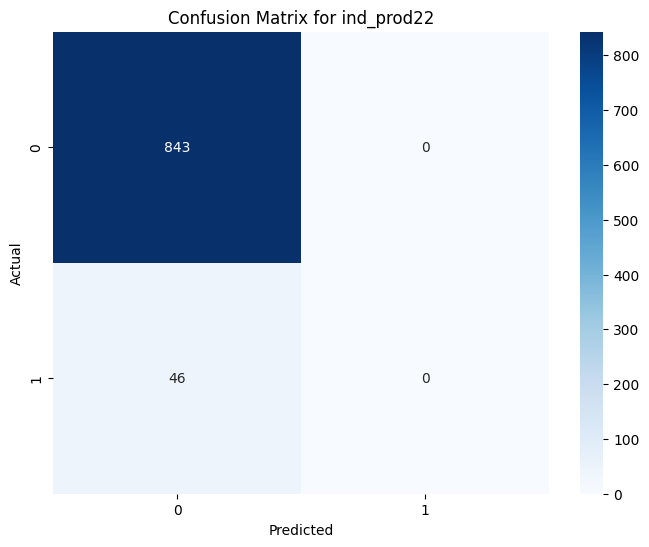

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


ind_prod23:
  Accuracy: 0.94
  Precision: 0.47
  Recall: 0.50
  F1 Score: 0.49


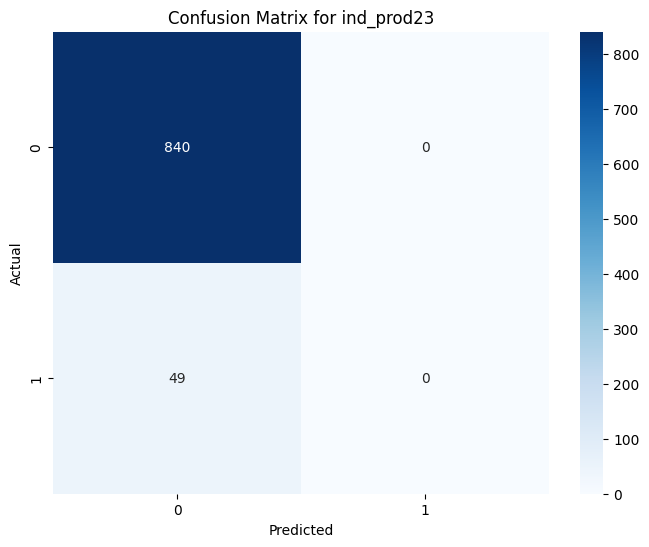

ind_prod24:
  Accuracy: 0.85
  Precision: 0.43
  Recall: 0.50
  F1 Score: 0.46


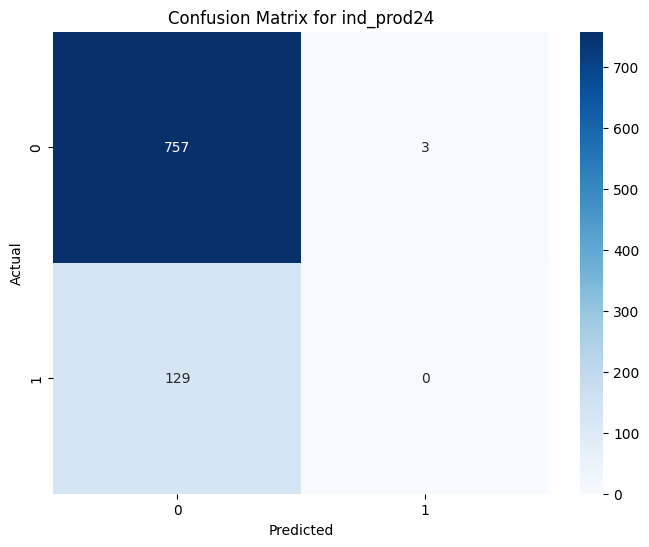

ind_prod25:
  Accuracy: 0.99
  Precision: 0.50
  Recall: 0.50
  F1 Score: 0.50


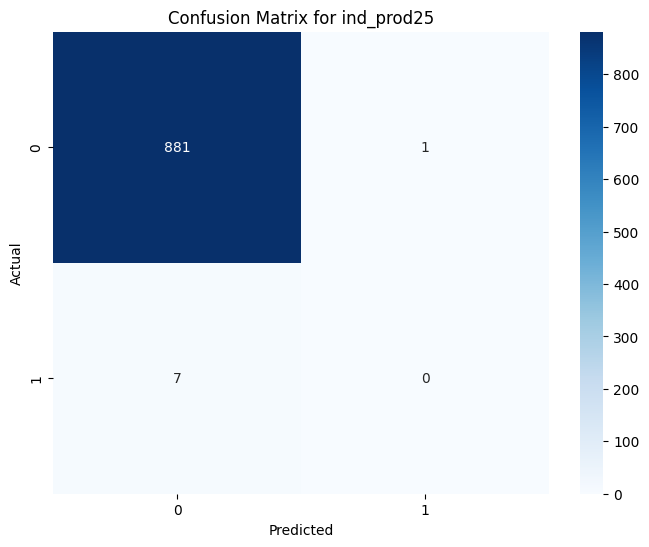

In [131]:
# Predict on the test data
Y_test_pred = multi_target_xgb.predict(X_test_scaled)
Y_test_pred_proba = multi_target_xgb.predict_proba(X_test_scaled)

# Calculate metrics for each target
metrics = {}
for i, col in enumerate(target_cols):
    accuracy = accuracy_score(Y_test[col], Y_test_pred[:, i])
    precision = precision_score(Y_test[col], Y_test_pred[:, i], average='macro')
    recall = recall_score(Y_test[col], Y_test_pred[:, i], average='macro')
    f1 = f1_score(Y_test[col], Y_test_pred[:, i], average='macro')
    cm = confusion_matrix(Y_test[col], Y_test_pred[:, i])
    
    metrics[col] = {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'confusion_matrix': cm
    }

    print(f'{col}:')
    print(f'  Accuracy: {accuracy:.2f}')
    print(f'  Precision: {precision:.2f}')
    print(f'  Recall: {recall:.2f}')
    print(f'  F1 Score: {f1:.2f}')
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix for {col}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()


In [154]:
import numpy as np
import pandas as pd

def apk(actual, predicted, k):
    if len(predicted) > k:
        predicted = predicted[:k]
    score = 0.0
    num_hits = 0.0
    for i, p in enumerate(predicted):
        if p in actual and p not in predicted[:i]:
            num_hits += 1.0
            score += num_hits / (i + 1.0)
    if not actual:
        return 0.0
    return score / min(len(actual), k)

def mapk(actual, predicted, k):    
    return np.mean([apk(a, p, k) for a, p in zip(actual, predicted)])

# Suponiendo que ya tienes Y_test y Y_test_pred_proba definidos
# y que target_cols es la lista de nombres de los productos (columnas objetivo)
# Asegúrate de que Y_test_pred_proba está en el formato correcto (lista de listas de probabilidades)

# Convertir las probabilidades en formato binario usando el umbral de 0.4
threshold = 0.1
Y_test_pred = (np.array(Y_test_pred_proba)[:, :, 1] >= threshold).astype(int)

# Transponer Y_test_pred para tener la misma forma que Y_test
Y_test_pred = Y_test_pred.transpose()

# Crear listas de productos contratados (actual) y productos predecidos (predicted)
actual = Y_test.apply(lambda row: [col for col, val in row.items() if val == 1], axis=1).tolist()

# Generar predicciones ordenadas para cada cliente
predicted = []
for probas in Y_test_pred_proba:
    product_prob_pairs = list(zip(target_cols, probas[:, 1]))  # [(product, probability), ...]
    sorted_products = [product for product, prob in sorted(product_prob_pairs, key=lambda x: x[1], reverse=True)]
    predicted.append(sorted_products)

# Calcular el MAP@7
mapk_score = mapk(actual, predicted, 7)
print(f'MAP@7 Score: {mapk_score:.4f}')

# Crear un DataFrame para las predicciones binarias y la columna de nombres de productos
predictions_binary = pd.DataFrame(Y_test_pred, columns=target_cols, index=Y_test.index)
predictions_binary['products_contracted'] = predictions_binary.apply(lambda row: [target_cols[i] for i in range(len(row)) if row[i] == 1], axis=1)



MAP@7 Score: 0.1248


/var/folders/kx/ttlm9tqs63z73zxt8n3pptvm0000gn/T/ipykernel_1336/4035094606.py:47: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  predictions_binary['products_contracted'] = predictions_binary.apply(lambda row: [target_cols[i] for i in range(len(row)) if row[i] == 1], axis=1)


In [155]:
# Crear un DataFrame para guardar solo los productos predichos
predicted_products_df = pd.DataFrame(predicted, columns=[f'product_{i+1}' for i in range(len(target_cols))])
predicted_products_df['products_contracted'] = predicted_products_df.apply(lambda row: ', '.join(row.dropna()), axis=1)

# Guardar los resultados en un archivo Excel
predictions_file_path = 'predicted_products_with_map7.xlsx'
predicted_products_df.to_excel(predictions_file_path, index=False)
print(f'Predictions saved to {predictions_file_path}')

Predictions saved to predicted_products_with_map7.xlsx
